# Content based Movie Recommender System by `Mr. Harshit Dawar`!
* It is a Memory based Approach.
* It takes into account the complete user profile, identifies the factors in items which a user likes in a item, then checks those factors in other items, then recommends those items which have those factors/aspects!
* Content based recommendation is a memory based approach because it takes into account all of the user Profile to identify the user taste, it do not compare it with other users.

## Importing Important Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Dataset!
* After downloading the dataset, unzip it in your system, then proceed further!

In [2]:
# Downloading the Dataset!
# !wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip

## Data PreProcessing

In [32]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
movies.shape

(34208, 3)

In [35]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [36]:
ratings.shape

(22884377, 4)

## Data Cleaning

In [37]:
# Dropping the column which is not required!
ratings.drop("timestamp", 1, inplace=True)

In [38]:
ratings.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [39]:
# Checking the NULL Values!
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [40]:
ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [41]:
# Extracting the year from the movies Dataset
movies["year"] = movies.title.str.extract("(\(\d\d\d\d\))", expand = False)

In [42]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [43]:
## Removing the Year from the Title
movies.title = movies.title.str.replace("(\(\d\d\d\d\))", "")

In [44]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji,Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men,Comedy|Romance,(1995)
3,4,Waiting to Exhale,Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II,Comedy,(1995)


In [45]:
## Removing the brackets from the Year Column
movies.year = movies.year.str.extract("(\d\d\d\d)", expand = False)

In [46]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [47]:
## Striping the Title Column!
movies.title = movies.title.apply(lambda x: x.strip())

In [48]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [49]:
## Converting Genres column into a list of Genres
movies.genres = movies.genres.str.split("|")

In [50]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [51]:
movies.isna().sum()

movieId     0
title       0
genres      0
year       68
dtype: int64

## Exploratory Data Analysis

In [81]:
movies.year.isna().sum()

68

In [83]:
# Filling Null Values with 0
movies.year.fillna(0, inplace = True)

In [84]:
movies.year.isna().sum()

0

In [87]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [90]:
# Checking the unique Values
movies.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', 0, '1903', '2007',
       '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899',
       '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896',
   

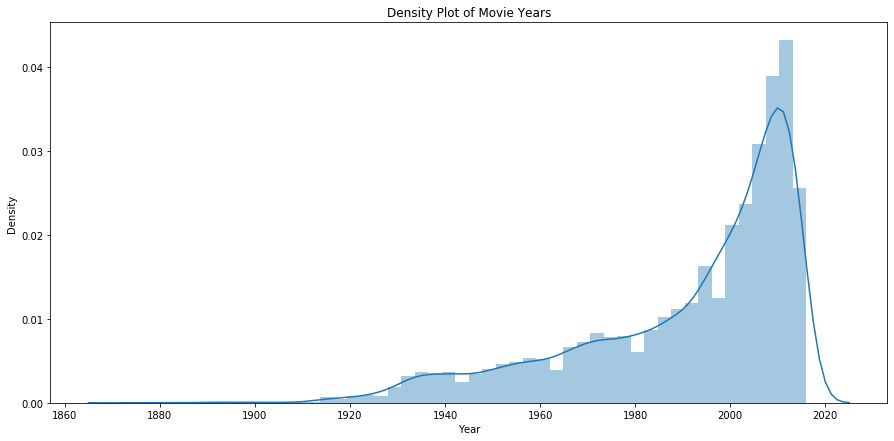

In [74]:
# Plotting a Density Plot of Years
plt.figure(figsize = (15, 7))
sns.distplot(movies.year[movies.year.notnull()])
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Density Plot of Movie Years")
plt.show()

In [91]:
# Converting Year from str to column
movies.year = pd.to_numeric(movies.year)

In [95]:
movies.dtypes

movieId     int64
title      object
genres     object
year        int64
dtype: object

In [98]:
movies.year.unique()

array([1995, 1994, 1996, 1976, 1992, 1988, 1967, 1993, 1964, 1977, 1965,
       1982, 1985, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1950, 1946,
       1987, 1997, 1974, 1956, 1958, 1949, 1972, 1998, 1933, 1952, 1951,
       1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1979, 1971, 1978, 1966, 1962,
       1983, 1984, 1931, 1922, 1999, 1927, 1929, 1930, 1928, 1925, 1914,
       2000, 1919, 1923, 1920, 1918, 1921, 2001, 1924, 2002, 2003, 1915,
       2004, 1916, 1917, 2005, 2006, 1902,    0, 1903, 2007, 2008, 2009,
       1912, 2010, 1913, 2011, 1898, 1899, 1894, 2012, 1909, 1910, 1901,
       1893, 2013, 1896, 2014, 2015, 1895, 1911, 1900, 2016, 1905, 1904,
       1891, 1892, 1908, 1897, 1887, 1888, 1890, 1878, 1874])

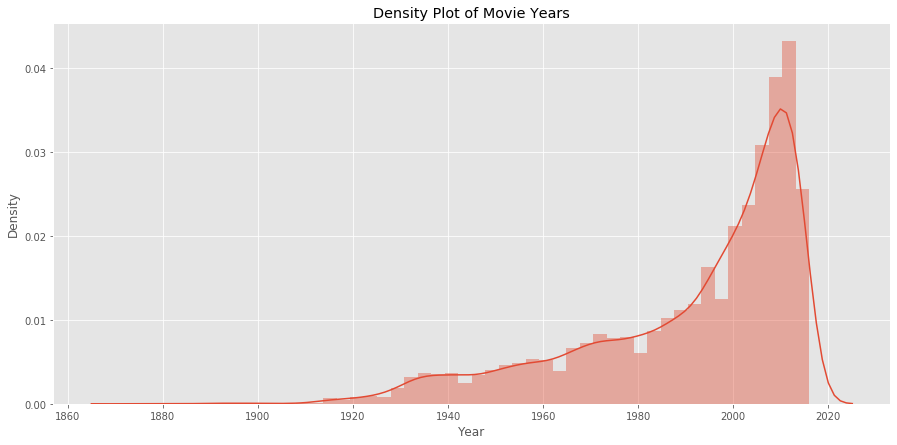

In [100]:
# Plotting Density Plot again after converting Year from String to Numeric!
plt.style.use("ggplot")
plt.figure(figsize = (15, 7))
sns.distplot(movies.year[movies.year > 0])
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Density Plot of Movie Years")
plt.show()

## Data Transfomration as required to construct a recommendation system!
* Creating a column for each genre, & assigning 1 to each genre for which a movie is a part of!

In [102]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [104]:
for index, row in movies.iterrows():
    for genre in row.genres:
        movies.at[index, genre] = 1

In [105]:
movies.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II,[Comedy],1995,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Changing NaN values to 0
movies.fillna(0, inplace = True)

In [107]:
movies.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating the User Input Dataset
* Here we have to select the movies which is present in the original movies dataset. Otherwise we will not be able to find the user taste if the input in unknown. This is also a drawback of this Approach!

In [108]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


## Constructing the User Profile

In [115]:
# Collecting the details of User Movies
user_movies = movies[movies.title.isin(inputMovies.title)]

In [116]:
user_movies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Merging user Movies with their ratings provided by the user!
user_Profile = pd.merge(user_movies, inputMovies)

In [124]:
user_Profile

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
4,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [128]:
# Removing the unwanted columns!
user_Final_Profile = user_Profile.drop(columns = ["title", "genres", "year", "movieId", "rating"], axis = 1)

In [129]:
user_Final_Profile.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
user_Final_Profile.shape

(5, 20)

In [132]:
user_Final_Profile.transpose()

,0,1,2,3,4
Adventure,1.0,1.0,0.0,1.0,0.0
Animation,1.0,0.0,0.0,1.0,0.0
Children,1.0,1.0,0.0,0.0,0.0
Comedy,1.0,0.0,1.0,0.0,1.0
Fantasy,1.0,1.0,0.0,0.0,0.0
Romance,0.0,0.0,0.0,0.0,0.0
Drama,0.0,0.0,1.0,0.0,1.0
Action,0.0,0.0,0.0,1.0,0.0
Crime,0.0,0.0,1.0,0.0,0.0
Thriller,0.0,0.0,1.0,0.0,0.0


In [131]:
user_Profile.rating

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

## Constructing a Recommendation Engine Manually by identifying User Taste

In [135]:
# Taking dot product of ratings and user Profile
user_Taste = user_Final_Profile.transpose().dot(user_Profile.rating)

### Displaying the final User Preference for Genres of Movie!

In [136]:
user_Taste

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [146]:
movies.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Calculating sum of genre for each movie

user_Preferences_Genres = movies.set_index(movies.movieId).drop(
    columns = ["movieId", "title", "genres", "year"], axis = 1
    ) * user_Taste

In [159]:
user_Preferences_Genres.shape

(34208, 20)

In [160]:
user_Preferences_Genres.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,10.0,8.0,5.5,13.5,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,0.0,5.5,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,13.5,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# Sum for each genre in the complete Movie Dataset
user_Preferences_Genres.sum()

Adventure              27630.0
Animation              11096.0
Children                8849.5
Comedy                136674.0
Fantasy                 9306.0
Romance                    0.0
Drama                 157740.0
Action                 20002.5
Crime                  17230.0
Thriller               26500.0
Horror                     0.0
Mystery                    0.0
Sci-Fi                  9702.0
IMAX                       0.0
Documentary                0.0
War                        0.0
Musical                    0.0
Western                    0.0
Film-Noir                  0.0
(no genres listed)         0.0
dtype: float64

In [162]:
# Final sum of all genres for each Movie
user_Preferences_Genres.sum(axis = 1)

movieId
1         42.5
2         21.0
3         13.5
4         23.5
5         13.5
          ... 
151697     5.0
151701     0.0
151703    10.0
151709    14.5
151711     0.0
Length: 34208, dtype: float64

In [163]:
# Taking Wighted Average of the Movies!
recommendations = user_Preferences_Genres.sum(axis = 1) / user_Taste.sum()

In [164]:
recommendations

movieId
1         0.594406
2         0.293706
3         0.188811
4         0.328671
5         0.188811
            ...   
151697    0.069930
151701    0.000000
151703    0.139860
151709    0.202797
151711    0.000000
Length: 34208, dtype: float64